In [12]:
import pyvista as pv
import numpy as np
from src.utils.commons import get_config
from src.utils.split_dataset import split_dataset
import os

config = get_config('configs/NACA0012.yaml')['config']

sample_size = config['data_sample']
print(f"Dataset directory: {config['dataset_dir']}")
print(f"Split directory: {config['split_dir']}")
print(f"Sample size: {sample_size}")

train_dir, val_dir, test_dir = split_dataset(data_dir=config['dataset_dir'], 
              split_dir=config['split_dir'], 
              sample_size=sample_size,
              test_split=False,
              overwrite=False)

Dataset directory: ./dataset/rans_naca0012/incompressible/flow
Split directory: ./dataset/rans_naca0012/incompressible/flow_split
Sample size: 20
split directory ./dataset/rans_naca0012/incompressible/flow_split already exists, taking the existing split. Set overwrite to True to overwrite.


# Load sample data

In [13]:
test_sampe  = os.path.join(train_dir, 'flow_1.vtu')

In [14]:
os.path.exists(test_sampe)

True

In [15]:
import pyvista as pv

plotter = pv.Plotter()
data = pv.read(test_sampe)
data

UnstructuredGrid (0x28c5f03dfc0)
  N Cells:    229376
  N Points:   230336
  X Bounds:   -4.845e+02, 5.010e+02
  Y Bounds:   -5.078e+02, 5.078e+02
  Z Bounds:   0.000e+00, 0.000e+00
  N Arrays:   12

In [16]:
velocity_array = data.get_array('Velocity')[:,:2]
velocity_array

pyvista_ndarray([[0.9998476 , 0.01743849],
                 [0.99984777, 0.01742261],
                 [0.99984777, 0.01742936],
                 ...,
                 [0.9998403 , 0.01744636],
                 [0.99984026, 0.0174467 ],
                 [0.99984145, 0.01744962]], dtype=float32)

In [17]:
position_array = data.points[:,:2]
position_array

pyvista_ndarray([[5.0100000e+02, 5.3522026e-08],
                 [4.7512811e+02, 5.3522026e-08],
                 [4.5059491e+02, 5.3522026e-08],
                 ...,
                 [4.5081860e+02, 4.9355005e+02],
                 [4.7526303e+02, 4.9353067e+02],
                 [5.0100000e+02, 4.9352267e+02]], dtype=float32)

Plot

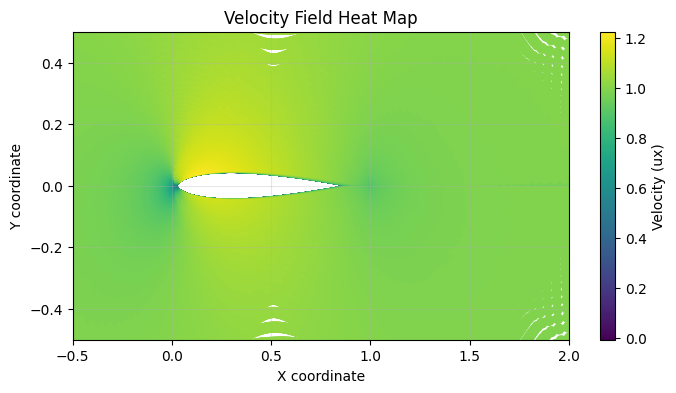

In [18]:
import matplotlib.pyplot as plt
ux_field = velocity_array[:,0]
uy_field = velocity_array[:,1]
x = np.array([coord[0] for coord in position_array])
y = np.array([coord[1] for coord in position_array])

plt.figure(figsize=(8, 4))
scatter = plt.scatter(x, y, 
                     c=ux_field,  # Color based on ux values
                     cmap='viridis',  # You can change this to other colormaps like 'jet', 'hot', etc.
                     s=50)  # Size of the points
# Add a colorbar
plt.colorbar(scatter, label='Velocity (ux)')

# Add labels and title
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.title('Velocity Field Heat Map')

plt.xlim(-0.5, 2)
plt.ylim(-0.5, 0.5)
# Make the plot more readable
plt.grid(True, alpha=0.3)

# Show the plot
plt.show()

In [20]:
import meshio

mesh = meshio.read(config['mesh_file'], file_format='su2')
mesh

Warning: meshio does not support tags of string type.
    Surface tag  airfoil will be replaced by 1

Warning: meshio does not support tags of string type.
    Surface tag  farfield will be replaced by 2

<meshio mesh object>
  Number of points: 230336
  Number of cells:
    quad: 229376
    line: 1920
  Cell data: su2:tag

In [25]:
mesh.cells[0].data

array([[     0,      1,    705,    704],
       [     1,      2,    706,    705],
       [     2,      3,    707,    706],
       ...,
       [229435, 229436, 230333, 230332],
       [229436, 229437, 230334, 230333],
       [229437, 229438, 230335, 230334]])